# Recap - The Cars Dataset

In [1]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4 - MACHINE LEARNING

## 4.1 - Preprocessing

### 4.1.1 - Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 4.1.2 - Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 4.1.3 - Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 4.1.4 - Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

# 🚗 The Cars dataset

👇 Run the code down below to import the [***ML_Cars_Recap_dataset.csv dataset***](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv) - _this version is slightly different from the one in the challenge 3._

In [2]:
aws_url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_Recap_dataset.csv"
cars = pd.read_csv(aws_url)
cars.head()


# Note: It is a common practice to store csv online. This one is stored on the AWS account of LeWagon

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,four,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,six,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,four,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,five,3.40,5500.0,expensive


In [3]:
cars.shape # 205 cars x 8 features

(205, 8)

ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt).

❓ **Question (Information)** ❓ Collect some basic information about your dataset.

In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   carwidth        205 non-null    float64
 2   curbweight      205 non-null    float64
 3   enginetype      205 non-null    object 
 4   cylindernumber  205 non-null    int64  
 5   stroke          205 non-null    float64
 6   peakrpm         205 non-null    float64
 7   price           205 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 12.9+ KB


In [8]:
cars.head(1)

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.1,2548.0,dohc,four,2.68,5000.0,expensive


In [9]:
cars.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [7]:
cars.dtypes

aspiration         object
carwidth          float64
curbweight        float64
enginetype         object
cylindernumber     object
stroke            float64
peakrpm           float64
price              object
dtype: object

In [20]:
cars.price.unique()

array(['expensive', 'cheap'], dtype=object)

In [22]:
cars.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

# (1) 🛠 Data preparation

## (1.0) Pre-requisites

❓ **Question (Potential anomalies)** ❓ 

- Are there columns which need to be modified because of their data types? 
    - Please proceed accordingly.

In [14]:
cylinders = {
    "four": 4,    
    "six": 6,       
    "five": 5,      
    "eight": 8,     
    "two": 2,      
    "three": 3,     
    "twelve": 12    

}


In [17]:
cars['cylindernumber'] = cars['cylindernumber'].map(cylinders)

In [18]:
cars

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
1,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
2,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
3,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
4,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
...,...,...,...,...,...,...,...,...
200,std,68.90000,2952.0,ohc,4,3.15,5400.0,expensive
201,turbo,68.80000,3049.0,ohc,4,3.15,5300.0,expensive
202,std,68.90000,3012.0,ohcv,6,2.87,5500.0,expensive
203,turbo,68.90000,3217.0,ohc,6,3.40,4800.0,expensive


## (1.1) Duplicates

❓ **Question (Duplicated rows)** ❓ 

Compute the number of duplicated rows that the cars dataset has.

In [25]:
cars.duplicated().sum()

14

❓ **Question (Remove duplicates)** ❓ 

In [30]:
cars = cars.drop_duplicates().reset_index(drop=True) 

In [31]:
cars

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
1,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
2,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
3,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
4,std,66.30000,2507.0,ohc,5,3.40,5500.0,expensive
...,...,...,...,...,...,...,...,...
186,std,68.90000,2952.0,ohc,4,3.15,5400.0,expensive
187,turbo,68.80000,3049.0,ohc,4,3.15,5300.0,expensive
188,std,68.90000,3012.0,ohcv,6,2.87,5500.0,expensive
189,turbo,68.90000,3217.0,ohc,6,3.40,4800.0,expensive


## (1.2) Missing data

❓ **Question (`NaN`)** ❓ 

What is the percentage of `NaN` for each feature?

In [35]:
cars.isnull().sum().sort_values(ascending=False)/len(cars)

aspiration        0.0
carwidth          0.0
curbweight        0.0
enginetype        0.0
cylindernumber    0.0
stroke            0.0
peakrpm           0.0
price             0.0
dtype: float64

<details>
    <summary><i>Answer</i></summary>
    
😇 It is a miracle but we do not have missing values here. You can move to the next section of this notebook :) 
    
</details>

## (1.3) Defining the features $X$ and the target $y$

❓ **Question** ❓

- Store the features of this dataset in a variable $X$
- Store the target in a variable $y$.

In [36]:
ca

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,64.10000,2548.0,dohc,4,2.68,5000.0,expensive
1,std,65.50000,2823.0,ohcv,6,3.47,5000.0,expensive
2,std,65.88794,2337.0,ohc,4,3.40,5500.0,expensive
3,std,66.40000,2824.0,ohc,5,3.40,5500.0,expensive
4,std,66.30000,2507.0,ohc,5,3.40,5500.0,expensive


In [41]:
X = cars.drop(columns='price')
y = cars.price

❓ **Question (Quick look at the target)** ❓ What is the proportion of "cheap" cars vs. "expensive" cars ? 

In [46]:
round(y.value_counts(normalize=True),2)

expensive    0.61
cheap        0.39
Name: price, dtype: float64

## (1.4) Scaling numerical features

❓ **Question (quick glance at the numerical columns)** ❓

- Show the boxplots of all the numerical columns in one line of code
- Do the same with their distributions using histograms

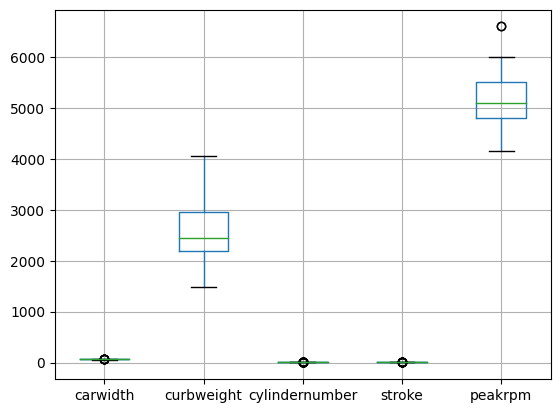

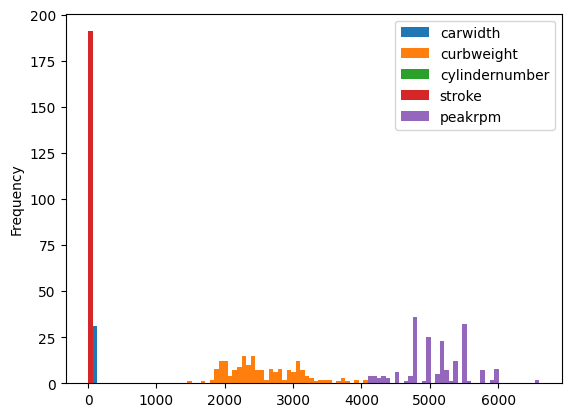

In [54]:
cars.boxplot()
cars.plot.hist(bins=100)
plt.show()

❓ **Question (Focus on the numerical columns)** ❓

Store the numerical columns of the cars dataset into `cars_num`.

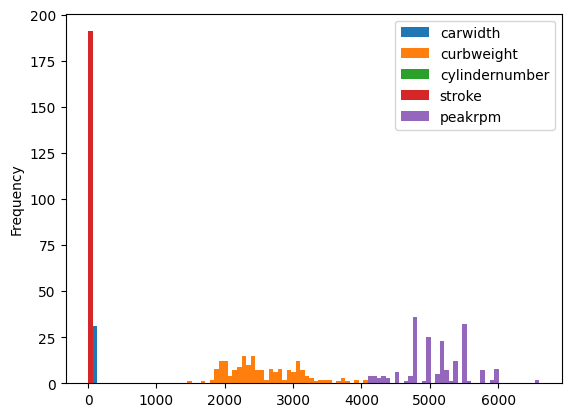

In [64]:
###########################
# Manual solution         # - not very smart
###########################

# num_features = ["carwidth", "curbweight", "cylindernumber", "stroke", "peakrpm"]
# cars_num = X[num_features]

# That is one way to select the numerical features...
# But not very smart...

###########################
# Elegant solution        # - much better
###########################

cars_num = X.select_dtypes(exclude = ['object']) # selecting only the numerical features
cars_num.plot.hist(bins=100)
plt.show()

❓ **Question (Robust Scaler)** ❓

👨🏻‍🏫 Robust Scaling all the numerical features is a quick and efficient way of scaling.

In [58]:
# Instantiating a RobustScaler
robust_scaler = RobustScaler()

# Creating a copy of the original numerical features 
cars_num_scaled = cars_num.copy()

# Scaling the features and storing them in the copy
cars_num_scaled = pd.DataFrame(robust_scaler.fit_transform(cars_num_scaled),
                               columns = cars_num.columns)

# Showing the scaled features
cars_num_scaled

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,-0.555556,0.135659,0.0,-2.033333,-0.142857
1,-0.037037,0.490956,2.0,0.600000,-0.142857
2,0.106644,-0.136951,0.0,0.366667,0.571429
3,0.296296,0.492248,1.0,0.366667,0.571429
4,0.259259,0.082687,1.0,0.366667,0.571429
...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571
187,1.185185,0.782946,0.0,-0.466667,0.285714
188,1.222222,0.735142,2.0,-1.400000,0.571429
189,1.222222,1.000000,2.0,0.366667,-0.428571


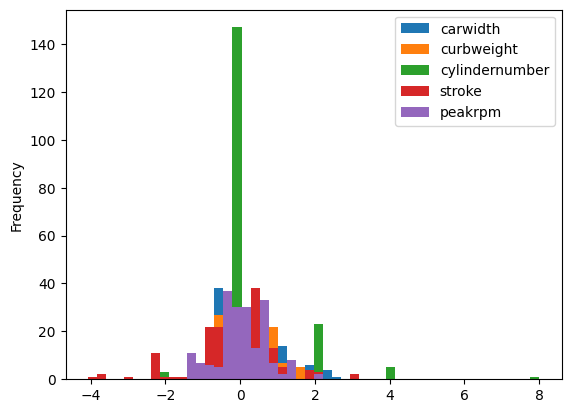

In [66]:
cars_num_scaled.plot.hist(bins=50)
plt.show()

## (1.5) Encoding categorical features

❓ **Question (Focus on the categorical columns)** ❓

Store the categorical columns of the cars dataset into `cars_categorical`.

In [68]:
# Manual solution --> not very smart

# categorical_features = ["aspiration", "enginetype"]
# cars_categorical = X[categorical_features]

# Elegant solution --> much better
cars_categorical = X.select_dtypes(include = ['object']) # selecting only the categorical features
cars_categorical

,aspiration,enginetype
0,std,dohc
1,std,ohcv
2,std,ohc
3,std,ohc
4,std,ohc
...,...,...
186,std,ohc
187,turbo,ohc
188,std,ohcv
189,turbo,ohc


❓ **Question: What is the expected number of columns generated if we encode the categorical features** ❓

In [72]:
cars['aspiration'].value_counts()

std      156
turbo     35
Name: aspiration, dtype: int64

In [70]:
cars.aspiration.nunique()

2

In [71]:
cars.enginetype.nunique()

7

❓ **Question (OneHotEncoder): Encode the categorical features** ❓

<details>
    <summary><i>Hints</i></summary>
    
- Drop a column when a categorical feature is binary
- Use full matrixes (Sklearn estimators don't understand sparse matrixes)
- Store them into a Pandas DataFrame called `encoded_features`
    - 💡 Once that the OHE is fitted to a DataFrame, the new columns' names are accessible through _`get_features_names_out()`_
    
</details>

In [73]:
ohe = OneHotEncoder(drop='if_binary', sparse=False, min_frequency=0.05)

ohe.fit(cars_categorical)

ohe.get_feature_names_out()



array(['aspiration_turbo', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_infrequent_sklearn'], dtype=object)

In [75]:
encoded_features = pd.DataFrame(ohe.transform(cars_categorical), columns=ohe.get_feature_names_out())
encoded_features

,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## (1.6) Concatenating all the preprocessed features together $X_{preprocessed}$

❓ **Question (aggregating all the preprocessed features together)** ❓

Concatenate `cars_num_scaled` and `cars_categorical` into `X_preprocessed`

In [77]:
X_preprocessed = pd.concat([cars_num_scaled, encoded_features], axis=1)
X_preprocessed

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,-0.555556,0.135659,0.0,-2.033333,-0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.037037,0.490956,2.0,0.600000,-0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.106644,-0.136951,0.0,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.296296,0.492248,1.0,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.259259,0.082687,1.0,0.366667,0.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1.222222,0.657623,0.0,-0.466667,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.185185,0.782946,0.0,-0.466667,0.285714,1.0,0.0,0.0,1.0,0.0,0.0,0.0
188,1.222222,0.735142,2.0,-1.400000,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.222222,1.000000,2.0,0.366667,-0.428571,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## (1.7) Encoding the target

❓ **Question (Encoding the categorical target)** ❓

Encode the target using 📚[***LabelEncoder***](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [79]:
target_encoded = LabelEncoder()

y_encoded = target_encoded.fit_transform(y)

In [82]:
pd.DataFrame({"target": y, "encoded_target": y_encoded}).sample(10)

,target,encoded_target
108,expensive,1
42,expensive,1
176,expensive,1
78,expensive,1
142,cheap,0
163,expensive,1
18,cheap,0
84,cheap,0
72,cheap,0
164,expensive,1


# (2) 🏋🏻‍♂️ Modeling (Logistic Regression)

🎯 Our goal is to predict whether a car will be expensive or cheap based on some features.

## (2.0) Cross-Validation

👩‍🏫 In Machine Learning, when you want to compare different models, a Cross Validation is a robust method to roughly assess the performance of each individual submodel.

❓ **Question (CrossValidation)** ❓

What is the potential performance of a LogisticRegression for this dataset?

In [88]:
logreg_model = LogisticRegression(max_iter=1000)

number_of_folds = 5
cv_scores = cross_validate(logreg_model, X_preprocessed, y_encoded, cv=number_of_folds)

In [94]:
print(f"Here are the accuracies for each of the {number_of_folds} folds: {cv_scores['test_score']}")
print(f"Here is the mean score of the {number_of_folds} folds {cv_scores['test_score'].mean()}")

Here are the accuracies for each of the 5 folds: [0.92307692 0.89473684 0.92105263 0.92105263 0.84210526]
Here is the mean score of the 5 folds 0.9004048582995952


In [95]:
print(f"💪 {round(cv_scores['test_score'].mean()*100,2)}%")

💪 90.04%


- 🚀 This accuracy is promising, let's go further !
- 🗣 We will discuss what is a good Regression/Classification model in the `Performance Metrics` unit.

## (2.1) Holdout Method

❓ **Question (Holdout): train/test split your dataset with a 70/30 ratio** ❓

<details>
    <summary><i>Hint</i></summary>

- For a binary target, you actually don't have to use to `LabelEncoder`.
    - Sklearn is smart enough to detect a binary target.
    
</details>

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3)

## (2.2) Training and evaluating

❓ **Question: Train/Evaluate a Logistic Regression model** ❓

In [97]:
# Instantiate a Logistic Regression model
logreg = LogisticRegression(max_iter = 100)

# Train the model
logreg.fit(X_train, y_train)

# Evaluate the model
logreg.score(X_test, y_test)

0.8275862068965517

## (2.3) Predicting

❓ **Question (Predicting a new "point")**❓

Does your ML algorithm (the Logistic Regression you've just trained) think that a car with the following features will be expensive? 

In [98]:
new_car = pd.DataFrame(columns = X.columns)
new_car.loc[0] = ['std', 65.88793969849246, 1874.0, 'ohc', 'four', 3.11, 5400.0]
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,four,3.11,5400.0


> 👨🏻‍🏫 **To make a prediction, this new car has to be through the same transformations as the ones performed in the training set!**

🌠 Have a look at the big picture of this recap [here](https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/prepare_dataset_fit_transform.png)!

In [99]:
# 0 - Fixing abnormal data

new_car['cylindernumber'] = 4
new_car

,aspiration,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,65.88794,1874.0,ohc,4,3.11,5400.0


In [101]:
# 1 - Scaling the numerical features
print('before scaling')
num_features = new_car.select_dtypes(exclude=['object']).copy()
display(num_features)

print("after scaling")
scaled_num_feature = robust_scaler.transform(num_features)
display(scaled_num_feature)


before scaling


,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,65.88794,1874.0,4,3.11,5400.0


after scaling


array([[ 0.10664433, -0.73514212,  0.        , -0.6       ,  0.42857143]])

In [103]:
scaled_num_feature = pd.DataFrame(scaled_num_feature, columns=num_features.columns)
scaled_num_feature

,carwidth,curbweight,cylindernumber,stroke,peakrpm
0,0.106644,-0.735142,0.0,-0.6,0.428571


In [104]:
# 2 - Encoding the categorical features
print("before encoding")
categorical_features = new_car.select_dtypes(include=['object']).copy()
display(categorical_features)


print("after encoding")
categorical_encoded = pd.DataFrame(ohe.transform(categorical_features),columns=ohe.get_feature_names_out())
display(categorical_encoded)

before encoding


,aspiration,enginetype
0,std,ohc


after encoding


,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [105]:
# 3 - Aggregating the numerical features and categorical features together

new_car_preprocessed = pd.concat([scaled_num_feature,categorical_encoded], axis=1)
new_car_preprocessed

,carwidth,curbweight,cylindernumber,stroke,peakrpm,aspiration_turbo,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_infrequent_sklearn
0,0.106644,-0.735142,0.0,-0.6,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [112]:
# 4 - Prediction

logreg.predict(new_car_preprocessed)[0]

'cheap'

# (3) 🧑🏿‍🏫 Warning about Data Leakage

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/cross_validation_data_leakage.png"  width=600 height=300>

🏁 Congratulations! You are an expert at preparing a dataset now !

🧑🏻‍🏫 Don't forget your flashcards and see you for the next section: `Performance Metrics`!